## Case 1 : Decesion Tree with Regression Problem

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
dataset = pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Decision Tree/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
dataset = pd.get_dummies(dataset, columns =['State'],drop_first = True)


In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [15]:
# split the data into dependent variable and independent variable

x = (dataset.iloc[:,0:3]).join(dataset.iloc[:,4:])
# x = dataset.drop(['Profit'],axis = 1)
# y = dataset[['Profit']]
y = dataset.iloc[:,3]


In [16]:
x.describe()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000


In [17]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [21]:
pd.DataFrame(y.head())

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [22]:
# Split the data into training and test

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.25,random_state = 1)


In [36]:
dtree_reg =DecisionTreeRegressor()
dtree_reg.fit(x_train,y_train) 

DecisionTreeRegressor()

In [37]:
y_pred_train =dtree_reg.predict(x_train)
y_pred_test = dtree_reg.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
print("Training Accuracy:", r2_score(y_train,y_pred_train))
print()
print("Testing Accuracy:", r2_score(y_test,y_pred_test))

Training Accuracy: 1.0

Testing Accuracy: 0.8855168054541833


# RandomForestRegression

In [41]:
# Just to check whether DecisonTreeRegression or RandomForestRegression which will give better results

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf = rf_reg.predict(x_test)

In [43]:
print("Training Accuracy:", r2_score(y_train,y_pred_train_rf))
print()
print("Testing Accuracy:", r2_score(y_test,y_pred_test_rf))

Training Accuracy: 0.9827275308082498

Testing Accuracy: 0.9422373344793923


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred_train_lr = linear.predict(x_train)
y_pred_test_lr = linear.predict(x_test)

In [46]:
print("Training Accuracy:", r2_score(y_train,y_pred_train_lr))
print()
print("Testing Accuracy:", r2_score(y_test,y_pred_test_lr))

Training Accuracy: 0.9419546147365754

Testing Accuracy: 0.9614855512866083


# Decision Tree Classifier(MultiClass)

In [48]:
df = pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Decision Tree/penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [50]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [51]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [52]:
df =df.drop(['studyName', 'Sample Number','Region','Stage','Individual ID','Date Egg',
               'Delta 15 N (o/oo)','Delta 13 C (o/oo)', 'Comments'],axis =1)

In [53]:
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193,3450,FEMALE


In [56]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    object 
 6   Body Mass (g)        342 non-null    object 
 7   Sex                  334 non-null    object 
dtypes: float64(2), object(6)
memory usage: 21.6+ KB


In [64]:
for i in df.columns:
    print("************************",i,"********************************")
    print()
    print(set(df[i].tolist()))

************************ Species ********************************

{'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)'}
************************ Island ********************************

{'Biscoe', 'Dream', 'Torgersen'}
************************ Clutch Completion ********************************

{'No', 'Yes'}
************************ Culmen Length (mm) ********************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.7, 38.2, 38.8, 37.5, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9

In [67]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [68]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)'] =='.','190',df['Flipper Length (mm)'])

In [69]:
df['Flipper Length (mm)'].value_counts()

190    23
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
181     7
189     7
230     7
192     7
184     7
199     6
213     6
188     6
214     6
217     6
222     6
201     6
219     5
209     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: Flipper Length (mm), dtype: int64

In [81]:
df['Flipper Length (mm)'].mean()

200.90058479532163

In [82]:
df['Flipper Length (mm)'].median()

197.0

In [71]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [72]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [74]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)'] =='.',np.nan,df['Body Mass (g)'])

In [75]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [76]:
df['Body Mass (g)'].mean()

4203.07917888563

In [77]:
df['Body Mass (g)'].median()

4050.0

<AxesSubplot:xlabel='Body Mass (g)'>

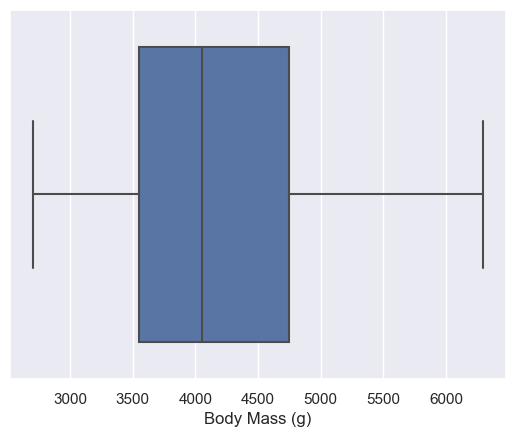

In [80]:
sns.boxplot(df['Body Mass (g)'])

In [88]:
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [84]:
df['Body Mass (g)']

0      4050.0
1      3800.0
2      3250.0
3      4050.0
4      3450.0
        ...  
339    4050.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: Body Mass (g), Length: 344, dtype: float64

<AxesSubplot:ylabel='Flipper Length (mm)'>

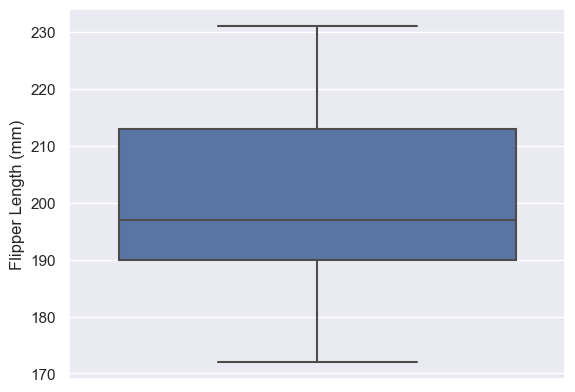

In [87]:
sns.boxplot(y='Flipper Length (mm)',data=df)

In [89]:
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())

<AxesSubplot:ylabel='Culmen Length (mm)'>

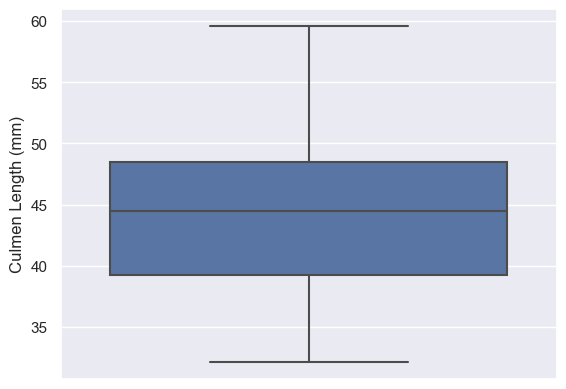

In [91]:
sns.boxplot(y='Culmen Length (mm)',data=df)


<AxesSubplot:ylabel='Culmen Depth (mm)'>

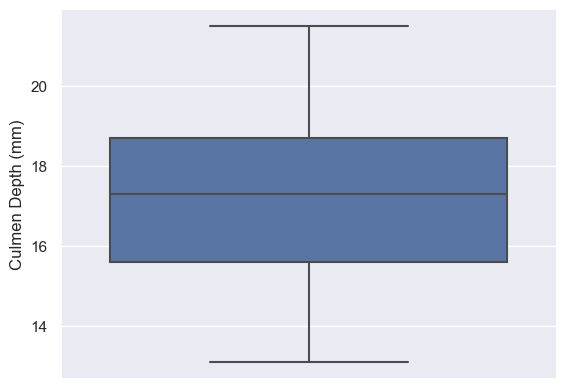

In [92]:
sns.boxplot(y='Culmen Depth (mm)',data=df)

In [94]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())

In [93]:
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())

In [95]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [96]:
df['Sex'] = np.where(df['Sex'] == '.','MALE',df['Sex'])

In [97]:
df['Sex'] = df['Sex'].fillna('MALE')

In [98]:
df.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   344 non-null    float64
 4   Culmen Depth (mm)    344 non-null    float64
 5   Flipper Length (mm)  344 non-null    float64
 6   Body Mass (g)        344 non-null    float64
 7   Sex                  344 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [100]:
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

In [101]:
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,Yes,39.10000,18.70000,181.000000,4050.0,MALE
1,0,Torgersen,Yes,39.50000,17.40000,186.000000,3800.0,FEMALE
2,0,Torgersen,Yes,40.30000,18.00000,190.000000,3250.0,FEMALE
3,0,Torgersen,Yes,43.92193,17.15117,200.900585,4050.0,MALE
4,0,Torgersen,Yes,36.70000,19.30000,193.000000,3450.0,FEMALE


In [102]:
df['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [103]:
df = pd.get_dummies(df,columns=['Island','Clutch Completion','Sex'],drop_first = True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                344 non-null    int8   
 1   Culmen Length (mm)     344 non-null    float64
 2   Culmen Depth (mm)      344 non-null    float64
 3   Flipper Length (mm)    344 non-null    float64
 4   Body Mass (g)          344 non-null    float64
 5   Island_Dream           344 non-null    uint8  
 6   Island_Torgersen       344 non-null    uint8  
 7   Clutch Completion_Yes  344 non-null    uint8  
 8   Sex_MALE               344 non-null    uint8  
dtypes: float64(4), int8(1), uint8(4)
memory usage: 12.6 KB


In [105]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,0,39.10000,18.70000,181.000000,4050.0,0,1,1,1
1,0,39.50000,17.40000,186.000000,3800.0,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.0,0,1,1,0
3,0,43.92193,17.15117,200.900585,4050.0,0,1,1,1
4,0,36.70000,19.30000,193.000000,3450.0,0,1,1,0


In [107]:
from pandas_profiling import ProfileReport
pr = ProfileReport(df)
pr.to_file("EDA of Penguin Decision Tree")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

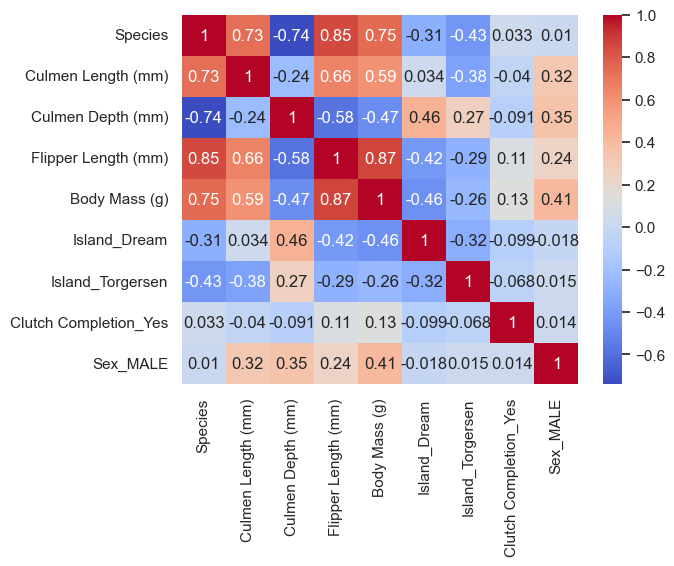

In [109]:
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm')

<AxesSubplot:>

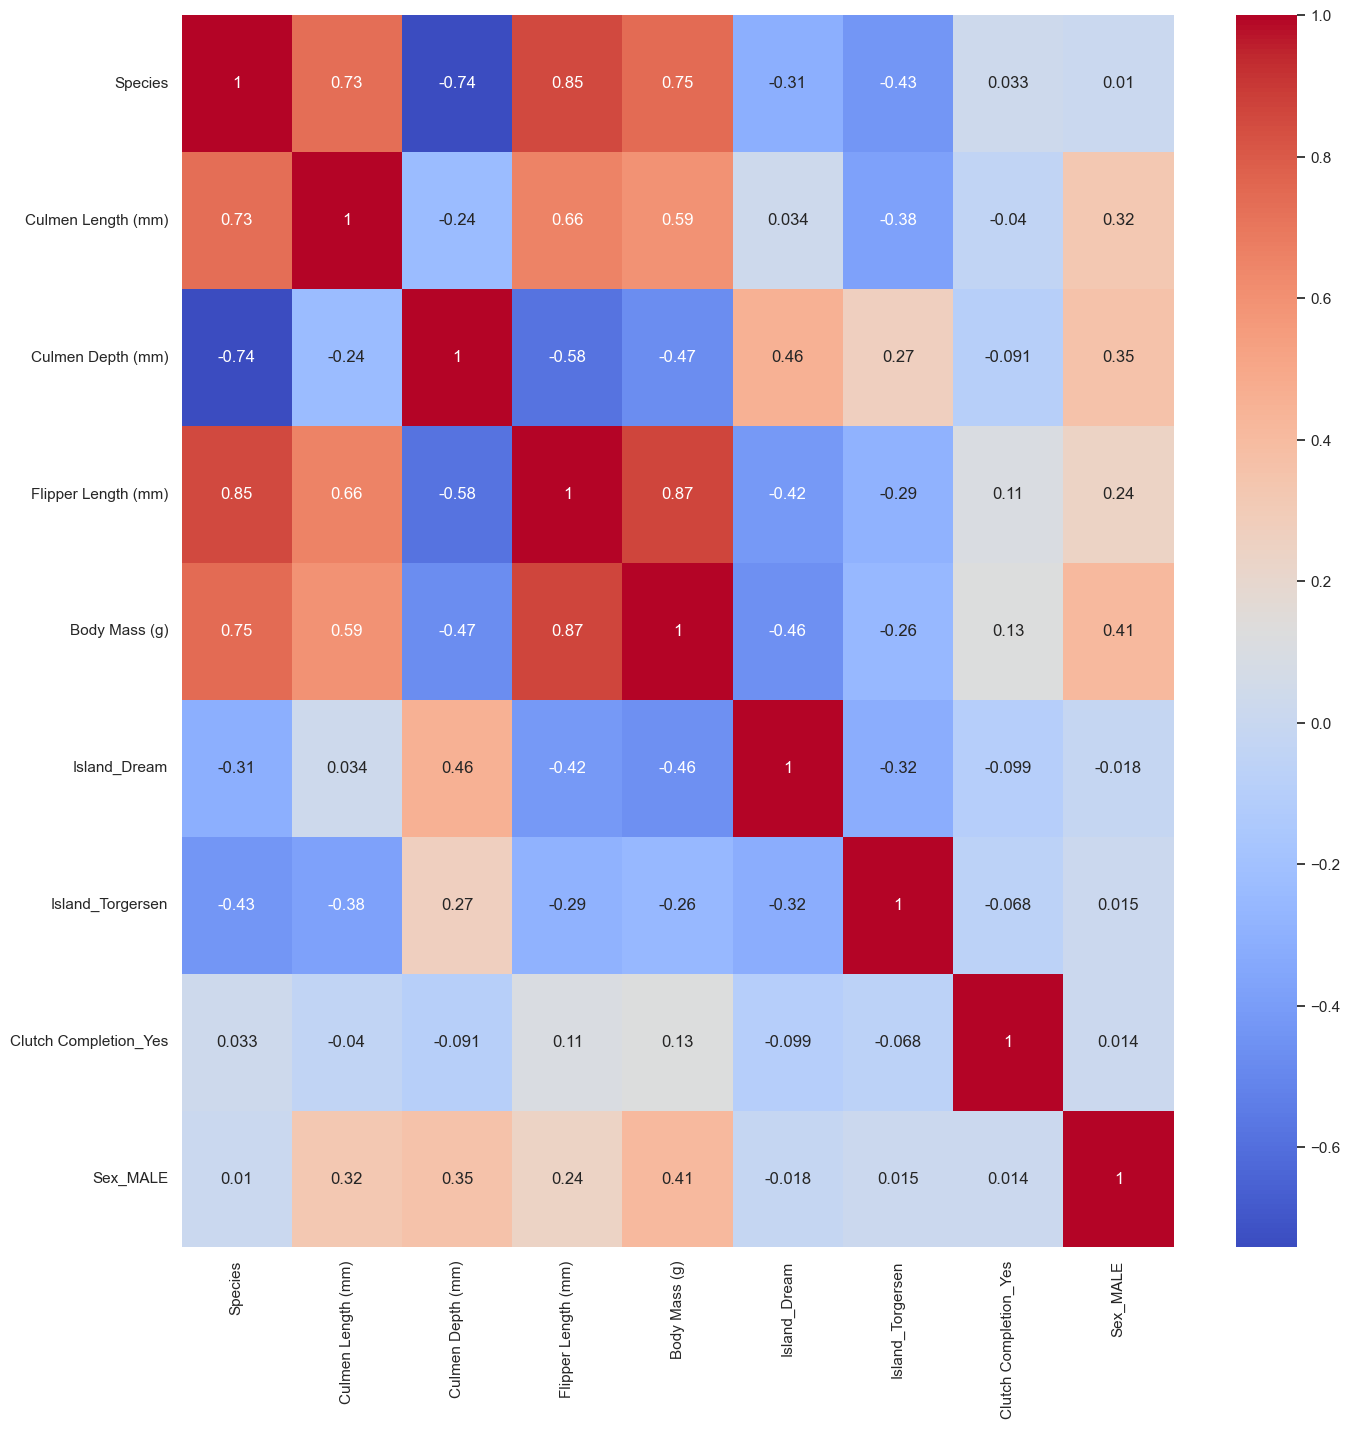

In [112]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm')

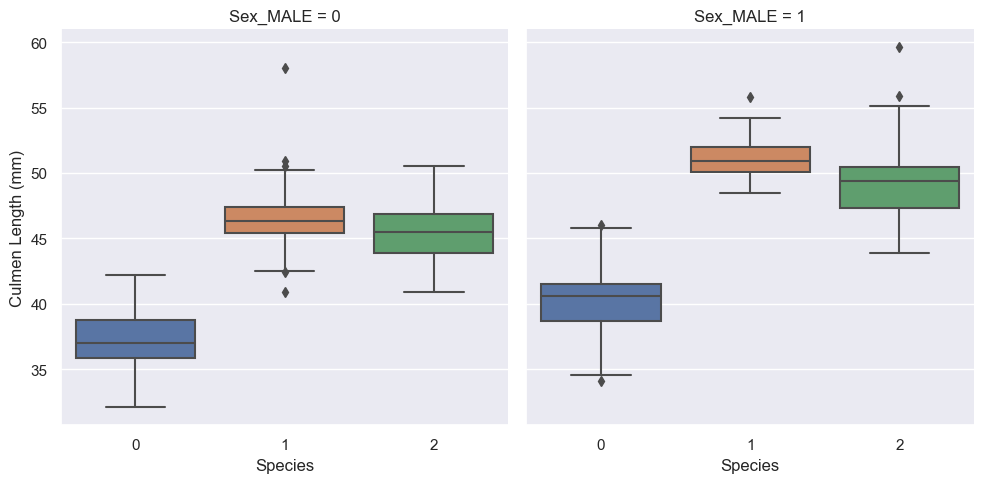

In [113]:
sns.catplot(data = df,x= 'Species', y = 'Culmen Length (mm)',kind = 'box', col ='Sex_MALE')
plt.show()

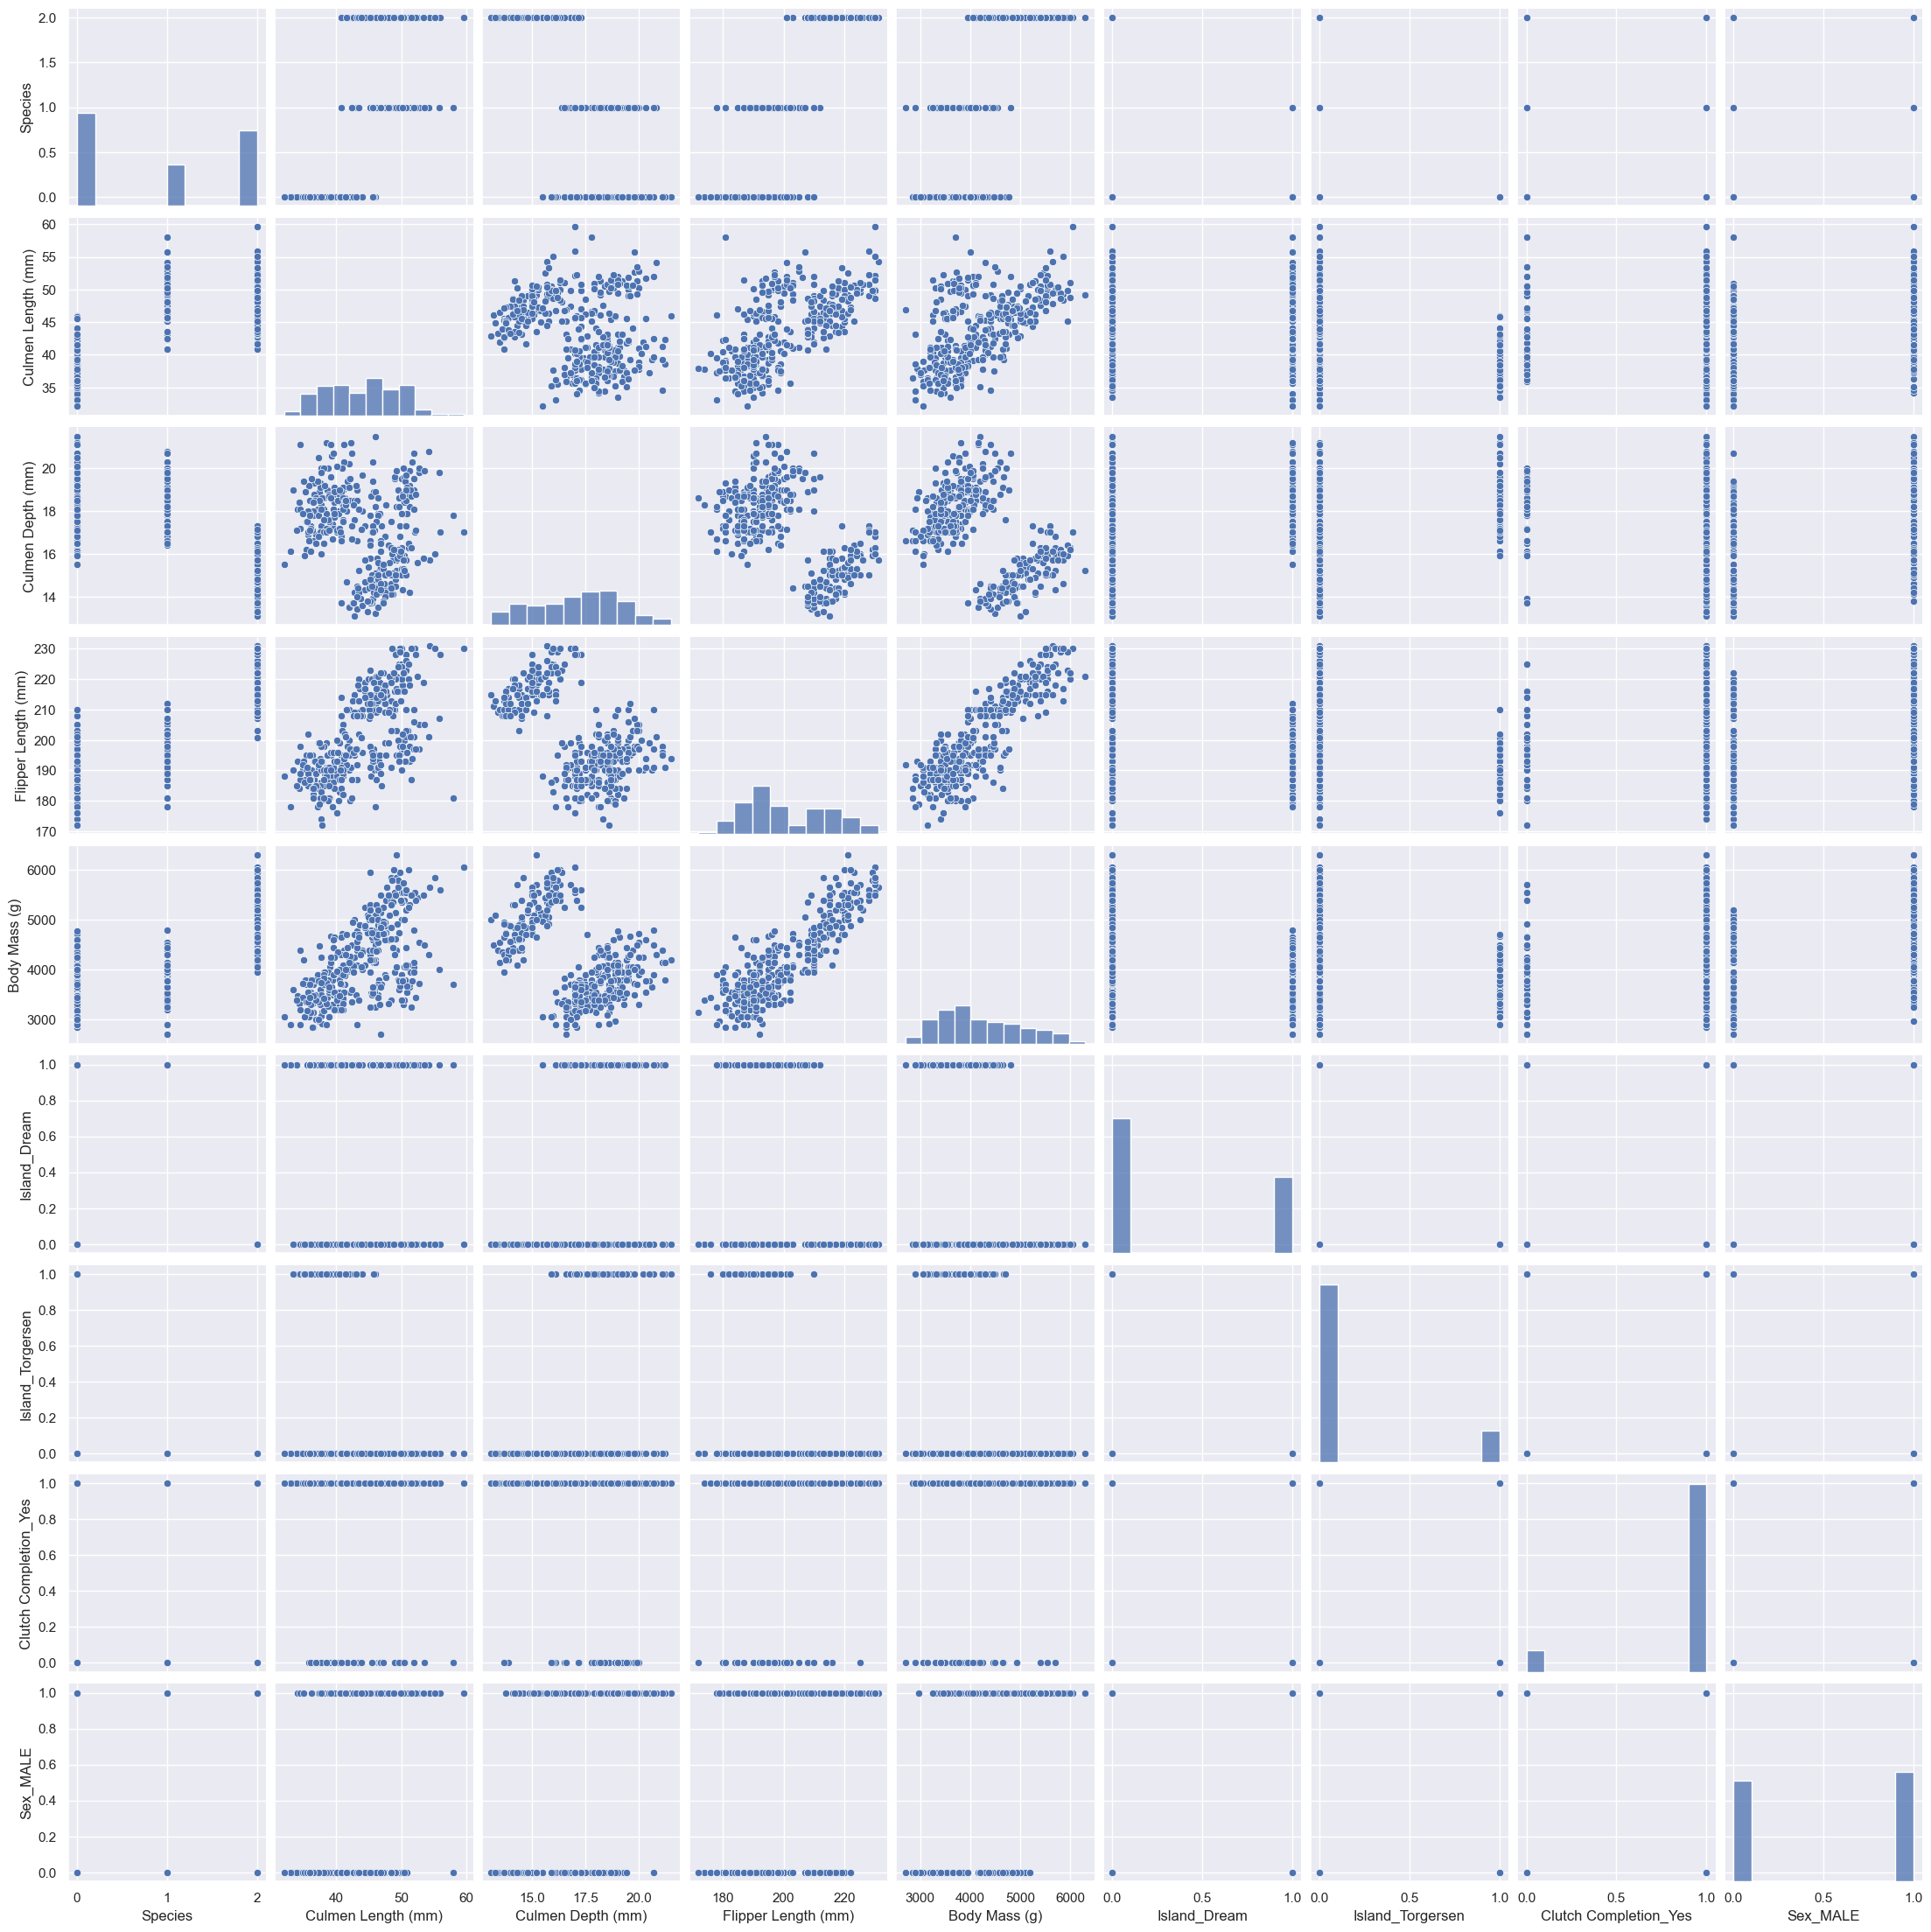

In [114]:
sns.pairplot(df)

<Figure size 1500x1200 with 0 Axes>

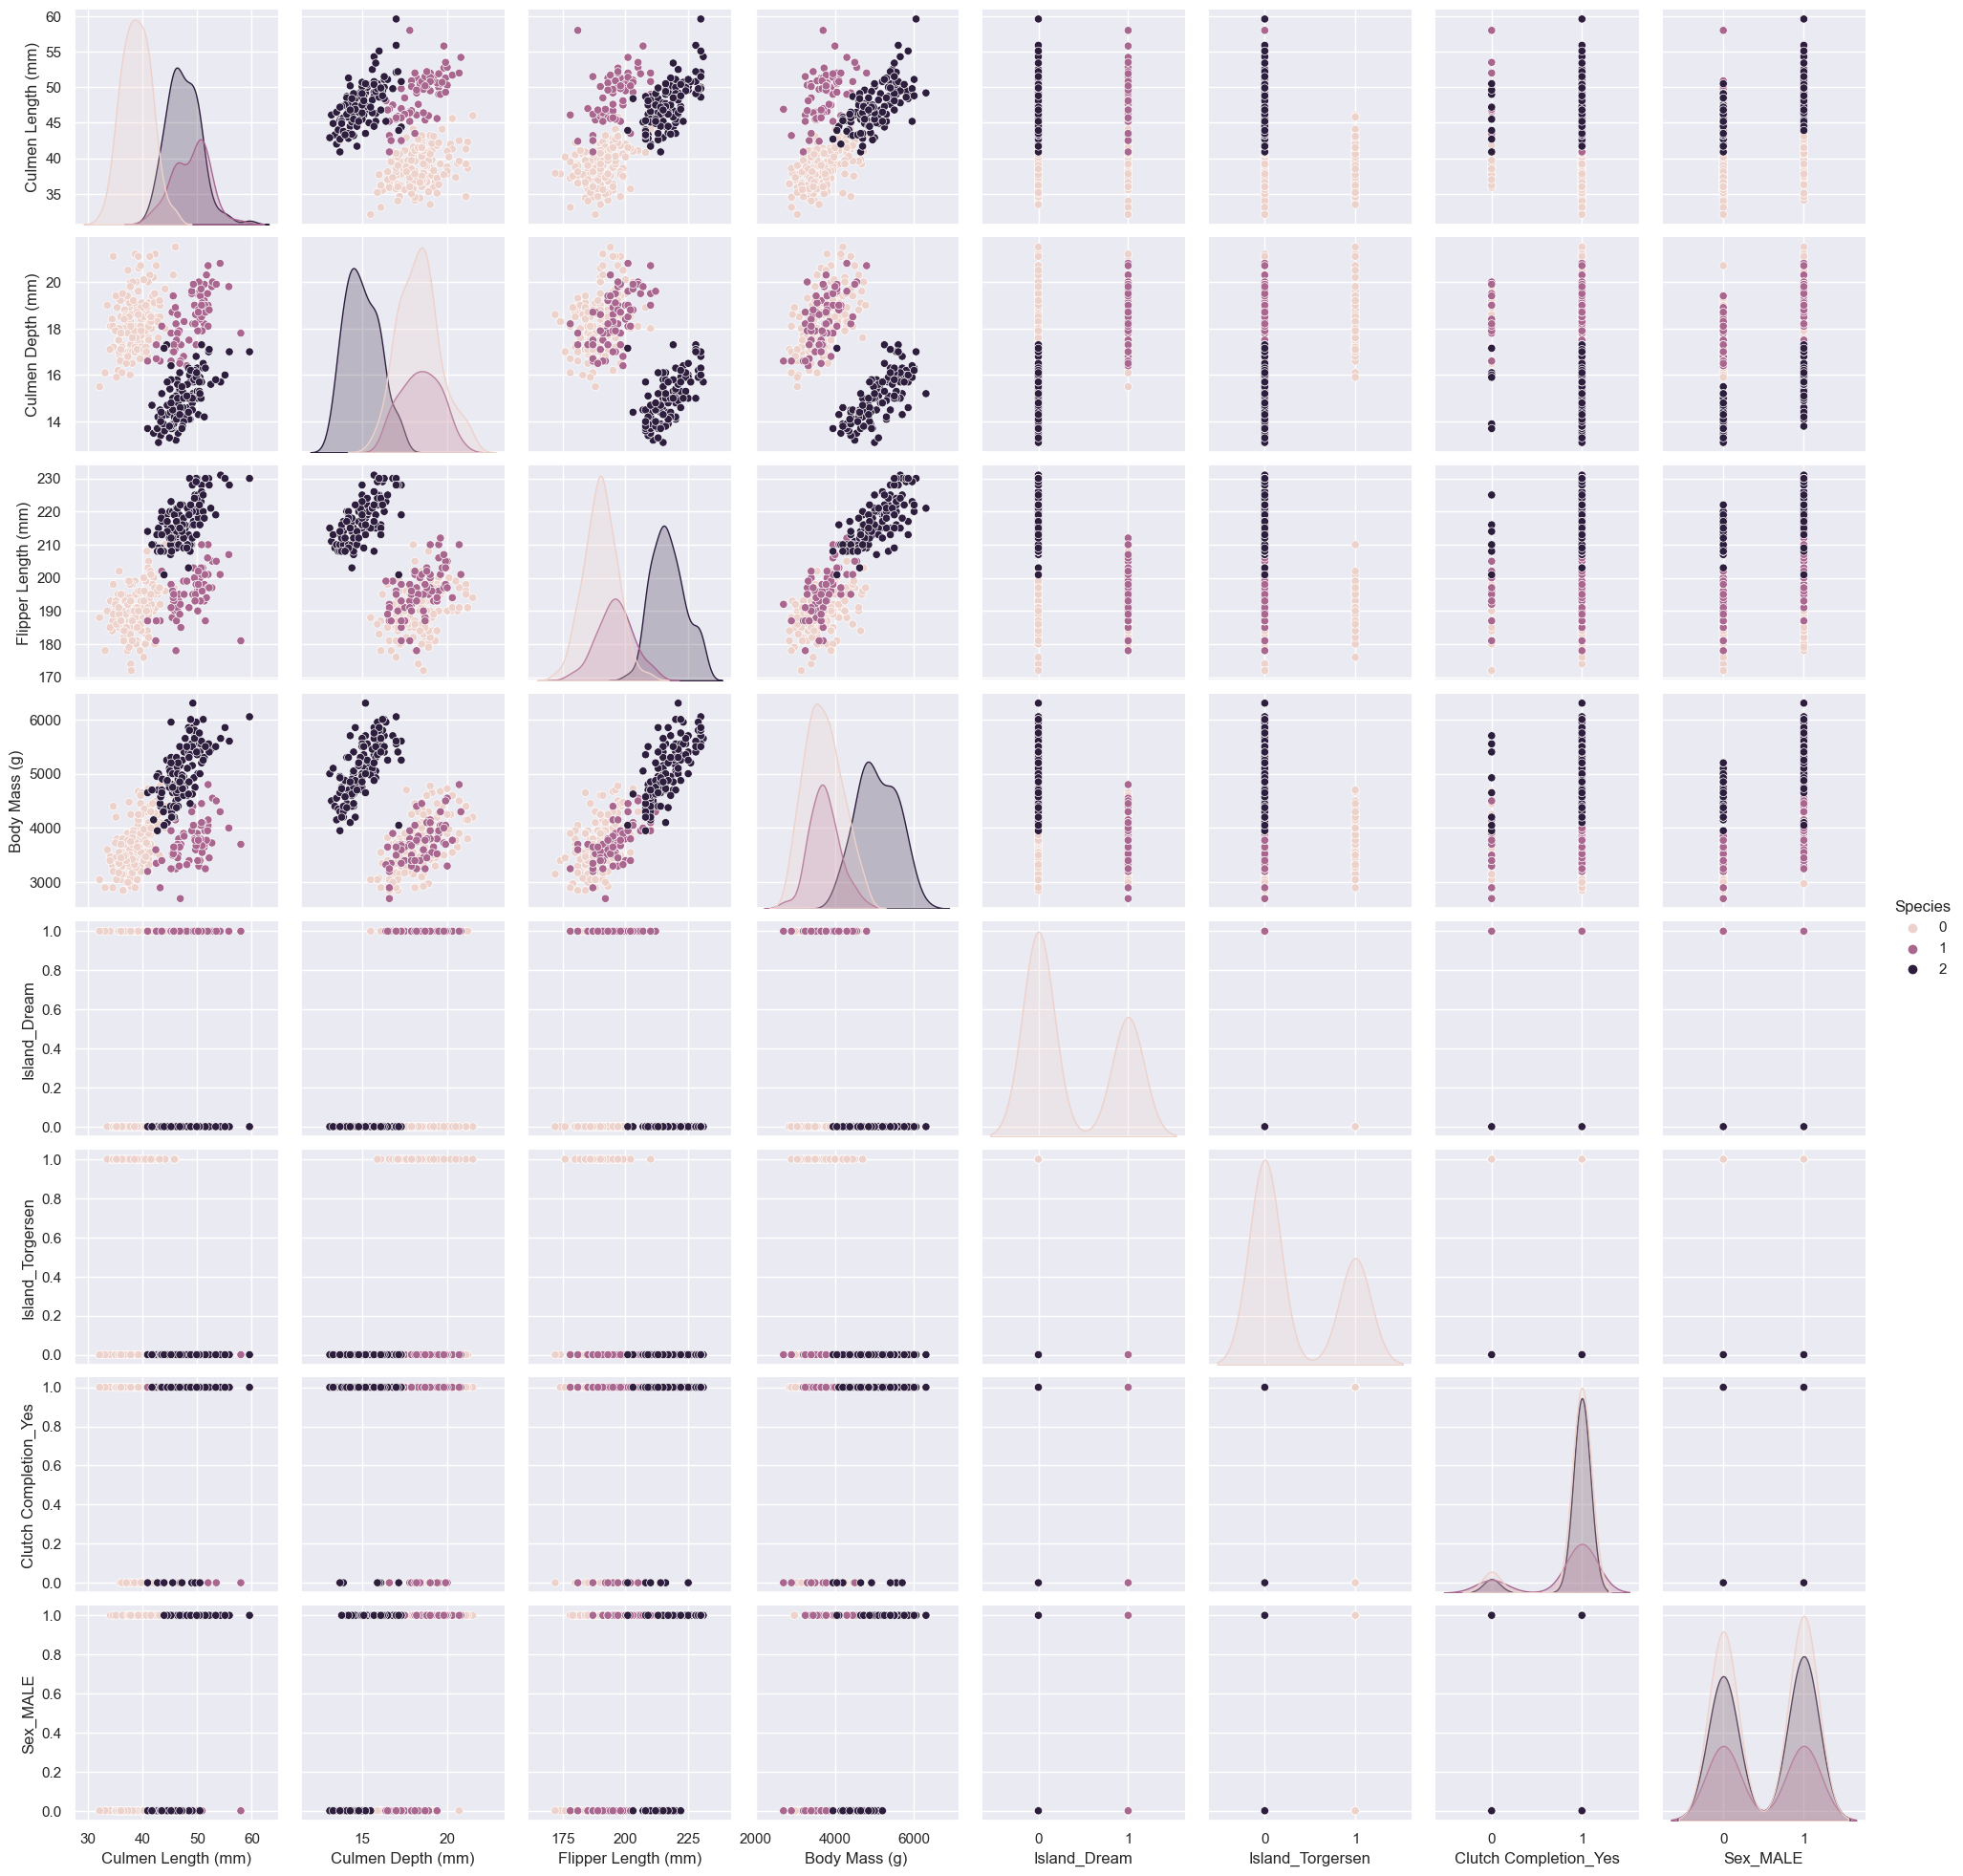

In [116]:
plt.figure(figsize = (15,12))
sns.pairplot(data = df,hue = 'Species')
plt.show()

In [117]:
df.head(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,0,39.1,18.7,181.0,4050.0,0,1,1,1
1,0,39.5,17.4,186.0,3800.0,0,1,1,0


In [121]:
# split the data into ind and dv 

x = df.drop(['Species'],axis = 1)
y = df[['Species']]

In [122]:
x.head(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,39.1,18.7,181.0,4050.0,0,1,1,1
1,39.5,17.4,186.0,3800.0,0,1,1,0


In [123]:
y.head(2)

,Species
0,0
1,0


In [125]:
y.value_counts()

Species
0          152
2          124
1           68
dtype: int64

In [124]:
# split the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 1,stratify = y)


In [126]:
# Building Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion = 'gini')
dtree1.fit(x_train,y_train)

dtree2 = DecisionTreeClassifier(criterion = 'entropy')
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [127]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

y_pred_dt2_train2 = dtree2.predict(x_train)
y_pred_dt2_test2 = dtree2.predict(x_test)

In [128]:
# Evaluation Matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [138]:
print( confusion_matrix(y_train,y_pred_dt1_train))
print()
print(confusion_matrix(y_test,y_pred_dt1_test))
print()
print(confusion_matrix(y_train,y_pred_dt2_train2))
print()
print(confusion_matrix(y_test,y_pred_dt2_test2))

[[114   0   0]
 [  0  51   0]
 [  0   0  93]]

[[35  1  2]
 [ 0 17  0]
 [ 0  0 31]]

[[114   0   0]
 [  0  51   0]
 [  0   0  93]]

[[36  0  2]
 [ 0 17  0]
 [ 0  0 31]]


In [137]:
print("Gini Training:",classification_report(y_train,y_pred_dt1_train))
print()
print("Gini Test:",classification_report(y_test,y_pred_dt1_test))
print()
print("Entropy Training:",classification_report(y_train,y_pred_dt2_train2))
print()
print("Entropy Training:",classification_report(y_test,y_pred_dt2_test2))

Gini Training:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        93

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


Gini Test:               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.94      1.00      0.97        17
           2       0.94      1.00      0.97        31

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.97        86
weighted avg       0.97      0.97      0.96        86


Entropy Training:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51
           2       1.00      

In [132]:
print(accurac y_score(y_train,y_pred_dt1_train))
print()
print(accuracy_score(y_test,y_pred_dt1_test))
print()
print(accuracy_score(y_train,y_pred_dt2_train2))
print()
print(accuracy_score(y_test,y_pred_dt2_test2))

1.0

0.9651162790697675

1.0

0.9767441860465116


## Cross Validataion

In [141]:
from sklearn.model_selection import cross_val_score
training_accuracy =cross_val_score(dtree1,x_train,y_train,cv=10)
print(training_accuracy)
print()
print("Training Mean Accuracy:",training_accuracy.mean())
print()
print("Training Max Accuracy:",training_accuracy.max())

[0.96153846 0.96153846 1.         1.         0.96153846 0.92307692
 1.         0.96153846 1.         0.92      ]

Training Mean Accuracy: 0.968923076923077

Training Max Accuracy: 1.0


In [144]:
# always we have to select cross validation accuracy as the final one
# Why we have taken only training,because we have overfitting problem only in training and not in test
print("*******************************Final Accuracy for Training and Test Result**********************")
print()
print("Training Mean Accuracy:",training_accuracy.mean())
print()
print("Test Accuracy:",accuracy_score(y_test,y_pred_dt1_test))

*******************************Final Accuracy for Training and Test Result**********************

Training Mean Accuracy: 0.968923076923077

Test Accuracy: 0.9651162790697675


## Feature Importance Variable


In [145]:
dtree1.feature_importances_

array([0.34480463, 0.076822  , 0.5385958 , 0.        , 0.03977756,
       0.        , 0.        , 0.        ])

In [149]:
x.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Island_Dream', 'Island_Torgersen',
       'Clutch Completion_Yes', 'Sex_MALE'],
      dtype='object')

In [152]:
dtree1.feature_importances_
# this will give the which variable is more importanat in predicting 'Dv'

array([0.34480463, 0.076822  , 0.5385958 , 0.        , 0.03977756,
       0.        , 0.        , 0.        ])

In [153]:
pd.DataFrame(index = x.columns, data = dtree1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.344805
Culmen Depth (mm),0.076822
Flipper Length (mm),0.538596
Body Mass (g),0.000000
Island_Dream,0.039778
Island_Torgersen,0.000000
Clutch Completion_Yes,0.000000
Sex_MALE,0.000000


## Decision Tree Visualization

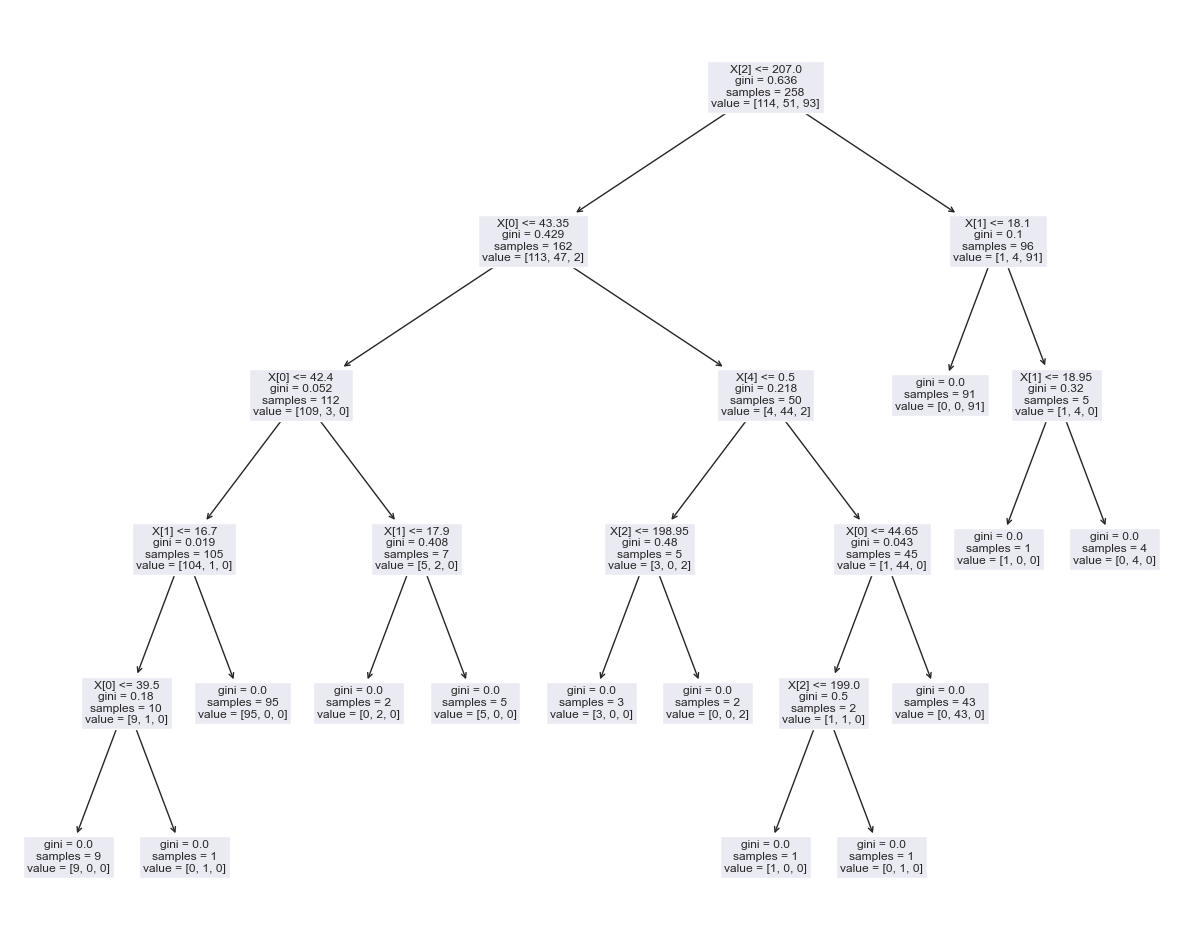

In [154]:
from sklearn.tree import plot_tree   
plt.figure(figsize = (15,12)) 
plot_tree(dtree1)
plt.show()

In [158]:
# values = [114,51,93], it means class1 satisfies-114 data points,class2-51, similarly

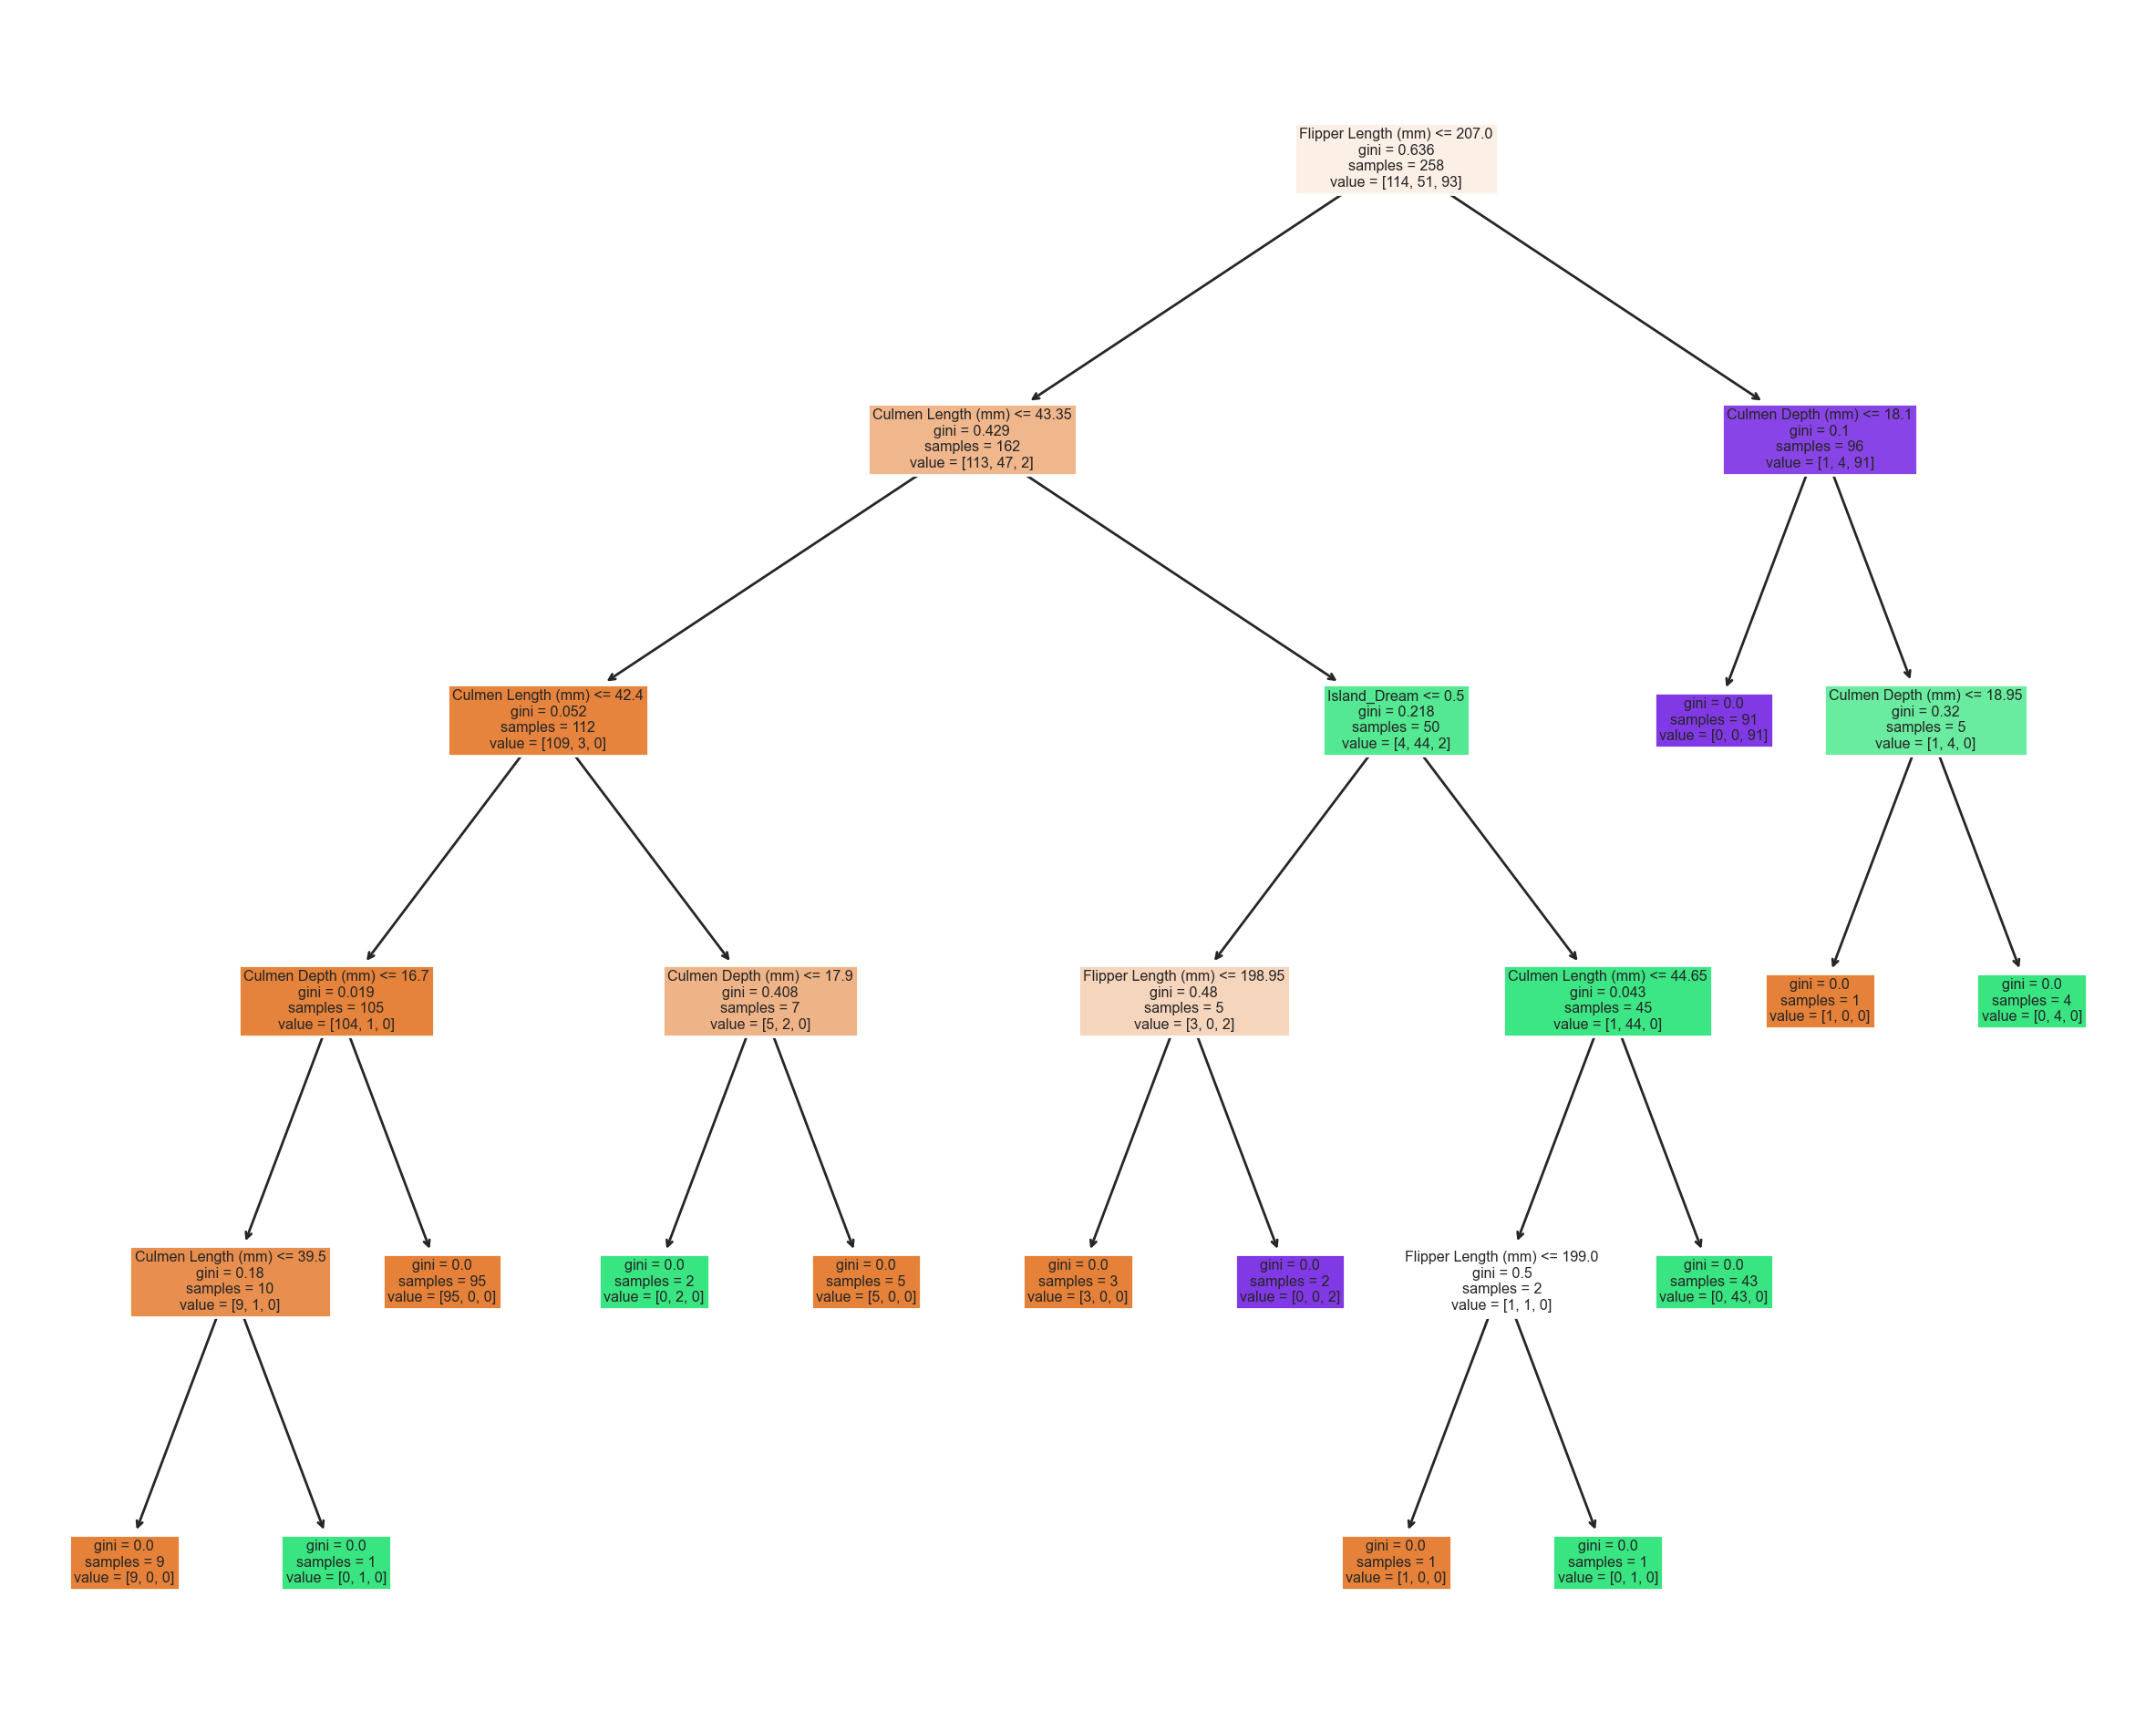

In [159]:
plt.figure(figsize = (15,12),dpi =200) # dpi = resolution
plot_tree(dtree1,filled = True,feature_names =x.columns)
plt.show()

In [163]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print(accuracy_score(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(15,12),dpi = 150)
    plot_tree(model,filled = True,feature_names = x.columns)

In [164]:
# HyperParameters tuning in DT

prunned_dt = DecisionTreeClassifier(max_depth = 3)
prunned_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       1.00      0.88      0.94        17
           2       0.97      0.97      0.97        31

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86

0.9534883720930233




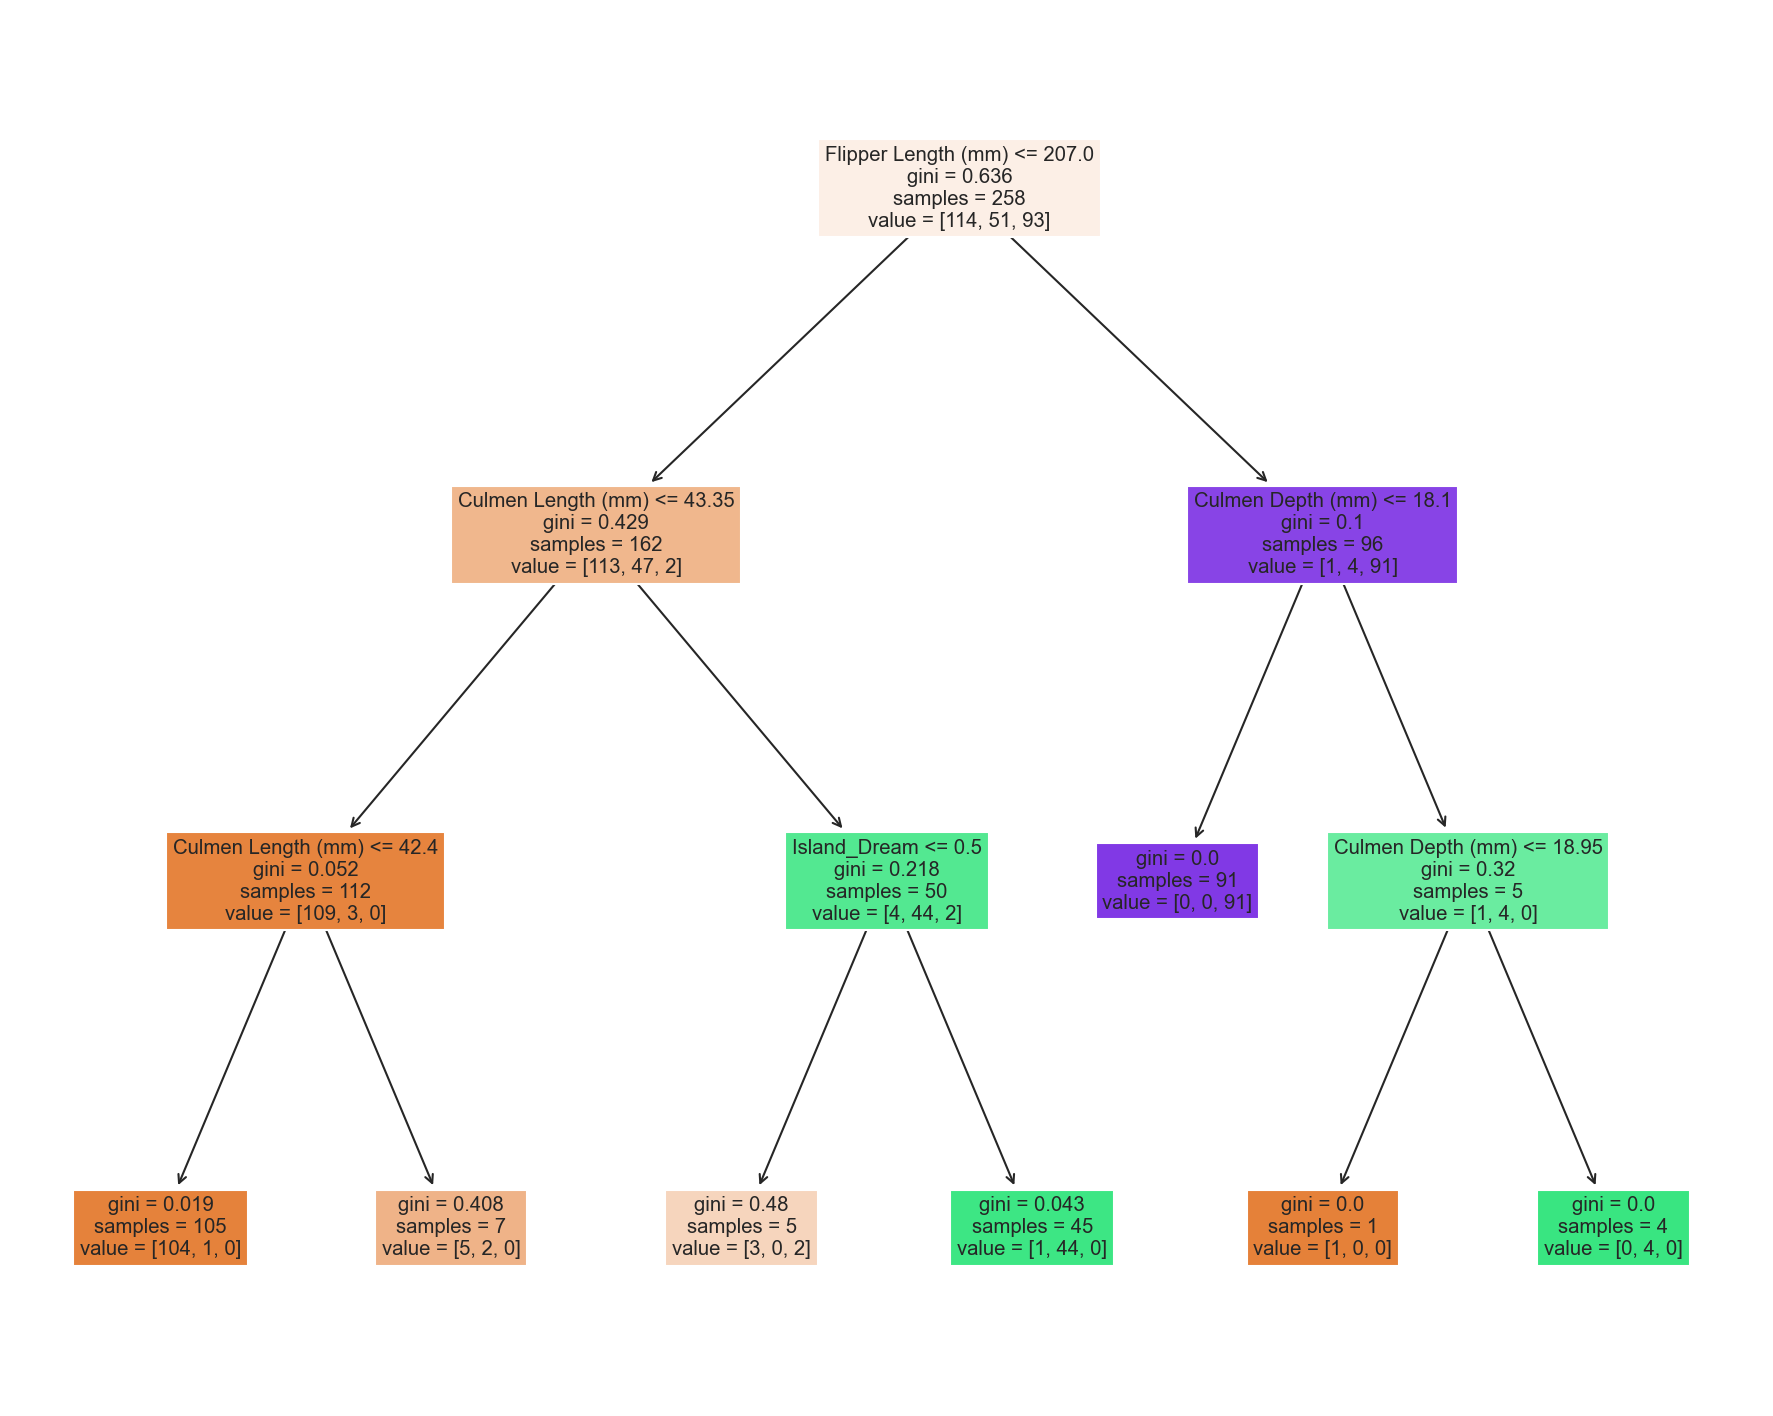

In [165]:
report_model(prunned_dt)

In [ ]:
# Earlier Test Accuracy: 0.9651162790697675,but now it is 0.9534883720930233,
 # because earlier we done with depth of 6 now with only 3 but still there is very less diff

In [168]:
# HyperParameters-2 tuning in DT (out of 3sets of terminal nodes,finding more significant)

prunned_dt1 = DecisionTreeClassifier(max_leaf_nodes = 3)
prunned_dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.88      0.88      0.88        17
           2       0.97      0.97      0.97        31

    accuracy                           0.94        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.94      0.94      0.94        86

0.9418604651162791




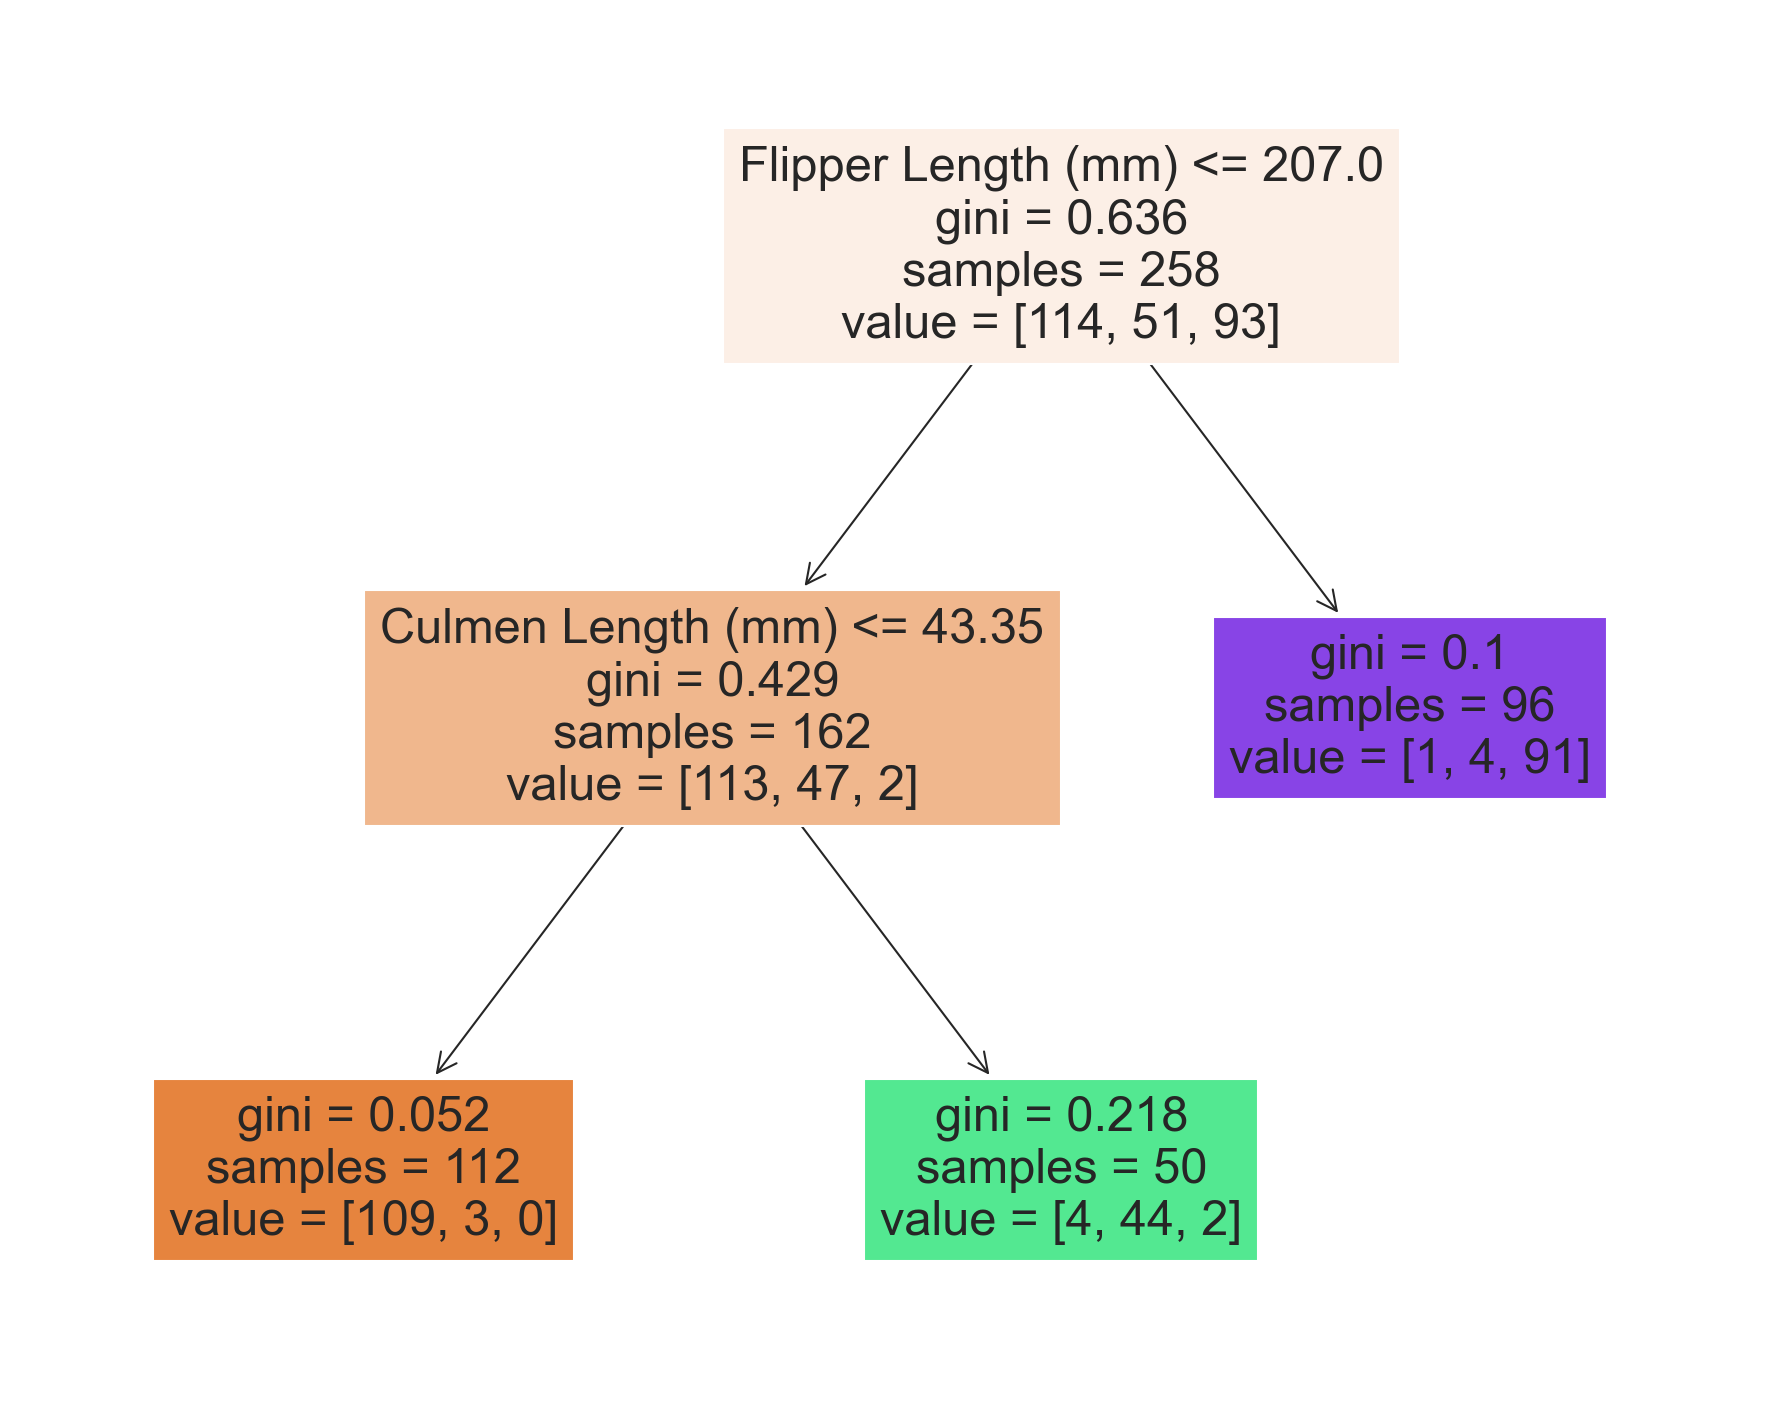

In [169]:
report_model(prunned_dt1)

## The END